# Example 1: Mixture of normal and exponential distributions

This example is inspired by particle physics:
The dataset consists of the reconstructed masses of possible particle candidates.
Background decays follow an exponential distribution, while signal decays follow a normal distribution.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from tensorprob import Model, Parameter, Normal, Exponential, Mix2, ScipyLBFGSBOptimizer
# We use the matplotlib_hep library to easily create high energy physics plots
from matplotlib_hep import histpoints
plt.rcParams['figure.figsize'] = (10.0, 6.0)

We model our distribution as a mixture of a normal distribution (parameters `mu` and `sigma` and mixture weight `f`) and an exponential distribution (parameter `lamb` and mixture weight `1 -f`).

This model can be translated into TensorProb as follows:

In [2]:
with Model() as model:
    mu = Parameter()
    sigma = Parameter(lower=0)
    lamb = Parameter(lower=0)
    f = Parameter(lower=0.0, upper=1)

    X = Mix2(f,
        Normal(mu, sigma, lower=0, upper=50),
        Exponential(lamb, lower=0, upper=50),
        lower=0,
        upper=50,
    )

We declare `X` as an observed variable and set suitable initial parameter values:

In [3]:
model.observed(X)
model.initialize({
    mu: 25,
    sigma: 2,
    lamb: 0.03,
    f: 0.2
})

The dataset is generated with numpy:

In [4]:
np.random.seed(0)
exp_data = np.random.exponential(40, 10000)
exp_data = exp_data[(0 < exp_data) & (exp_data < 50)]
norm_data = np.random.normal(20, 2, 500)
data = np.concatenate([exp_data, norm_data])

Now we perform a fit of the model using the default optimizer:

In [5]:
result = model.fit(data)
print(result)


OptimizationResult:
   calls: 48
    func: 29295.750875849644
 message: 'convergence: rel_reduction_of_f_<=_factr*epsmch'
   niter: 27
 success: True
       x: array([ 20.12408679,   1.64031853,   0.02645245,   0.06332244])


The fit converged successfully and we can visualize the distribution:

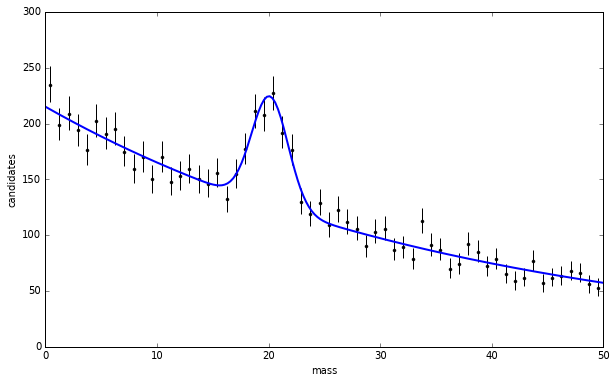

In [6]:
xs = np.linspace(0, 50, 200)
x, N, w = histpoints(data, bins=60, color='k', ms=3, capsize=0)
plt.plot(xs, w * model.pdf(xs), 'b-', lw=2)
plt.xlabel('mass')
plt.ylabel('candidates')